In [1]:
! gdown 1flhzM1YoKb-EzplqFPQuWEqnUVh5jGeX

Downloading...
From: https://drive.google.com/uc?id=1flhzM1YoKb-EzplqFPQuWEqnUVh5jGeX
To: /content/used_cars_UK_human_learning.zip
100% 1.15M/1.15M [00:00<00:00, 90.2MB/s]


https://drive.google.com/file/d/1flhzM1YoKb-EzplqFPQuWEqnUVh5jGeX/view?usp=sharing

In [2]:
! unzip /content/used_cars_UK_human_learning.zip -d /content/uk_cars

Archive:  /content/used_cars_UK_human_learning.zip
  inflating: /content/uk_cars/audi.csv  
  inflating: /content/uk_cars/bmw.csv  
  inflating: /content/uk_cars/cclass.csv  
  inflating: /content/uk_cars/focus.csv  
  inflating: /content/uk_cars/ford.csv  
  inflating: /content/uk_cars/hyundi.csv  
  inflating: /content/uk_cars/merc.csv  
  inflating: /content/uk_cars/skoda.csv  
  inflating: /content/uk_cars/toyota.csv  
  inflating: /content/uk_cars/unclean cclass.csv  
  inflating: /content/uk_cars/unclean focus.csv  
  inflating: /content/uk_cars/vauxhall.csv  
  inflating: /content/uk_cars/vw.csv  


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [ ]:
! gdown 1flhzM1YoKb-EzplqFPQuWEqnUVh5jGeX

Downloading...
From: https://drive.google.com/uc?id=1flhzM1YoKb-EzplqFPQuWEqnUVh5jGeX
To: /content/used_cars_UK_human_learning.zip
100% 1.15M/1.15M [00:00<00:00, 129MB/s]


https://drive.google.com/file/d/1flhzM1YoKb-EzplqFPQuWEqnUVh5jGeX/view?usp=sharing

In [ ]:
! unzip /content/used_cars_UK_human_learning.zip -d /content/uk_cars

Archive:  /content/used_cars_UK_human_learning.zip
  inflating: /content/uk_cars/audi.csv  
  inflating: /content/uk_cars/bmw.csv  
  inflating: /content/uk_cars/cclass.csv  
  inflating: /content/uk_cars/focus.csv  
  inflating: /content/uk_cars/ford.csv  
  inflating: /content/uk_cars/hyundi.csv  
  inflating: /content/uk_cars/merc.csv  
  inflating: /content/uk_cars/skoda.csv  
  inflating: /content/uk_cars/toyota.csv  
  inflating: /content/uk_cars/unclean cclass.csv  
  inflating: /content/uk_cars/unclean focus.csv  
  inflating: /content/uk_cars/vauxhall.csv  
  inflating: /content/uk_cars/vw.csv  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.style.use('seaborn')

# Боксплот

In [4]:
df = pd.read_csv('/content/uk_cars/toyota.csv')

In [7]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


<AxesSubplot:xlabel='model', ylabel='price'>

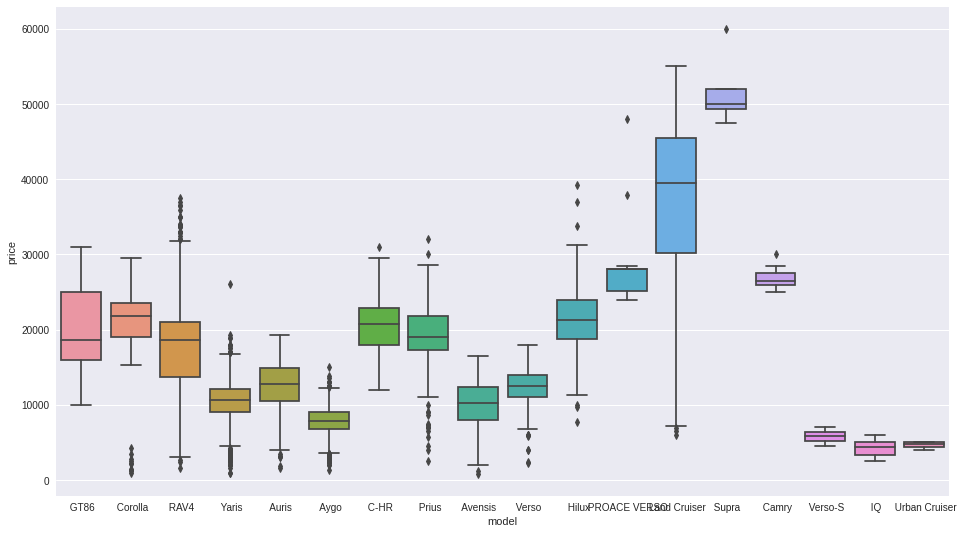

In [11]:
plt.figure(figsize=(16, 9))
sns.boxplot(data = df, y='price', x='model')

Границы ящика 25 и 75 квартили, усы либо до максимального значения, либо 1.5 квартиля (1.5 \* (Q3-Q1) + выбросы). Если после усов идут кружки **о** (выбросы, **outliers**), то они расположены на расстоянии 3(Q3-Q1), после них идут зездочки - extremies, экстримальные выбросы. Однако стоит понимать, что не все звоздочки и кружки являются выбросами. (выбросы в разных стат. пактеах могут обозначаться по разному, например, иметь одинаковое обозначение).

Боксплот это упрощенная гистограмма, вид сверху. Однако если распределение бимодальное или мульти, то боксплот этого не покажет. Их основная задача это сравнение нескольких распределений.

Также ящик не показывает число наблюдений, хотя порой это важно. Например, в данном случае 6 моделей нерепрезентативны.

In [13]:
df['model'].value_counts()

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

Как понять, какая типичная цена машин из вышепредставленных? Рассмотрим статистику:

In [14]:
df['price'].describe()

count     6738.000000
mean     12522.391066
std       6345.017587
min        850.000000
25%       8290.000000
50%      10795.000000
75%      14995.000000
max      59995.000000
Name: price, dtype: float64

<AxesSubplot:>

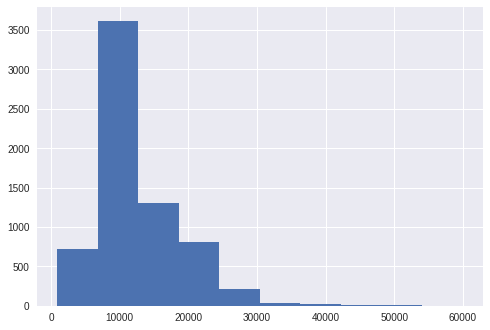

In [15]:
df['price'].hist()

При скошенных распределниях более правильным вариантом для представления о типичной цене является медиана. Также можно посмотреть усеченное среднее (по 2.5% наблюдений отбрасывается).

In [19]:
from scipy import stats
stats.trim_mean(df['price'], 0.025) # хотя в данном случае ничего не поменялось

12184.228522336769

История про пакеты: у многих магазинов премия для сотрудников определяется по среднему чеку. Поэтому, кассиры не любят, когда после пробития чека покупатели просят продать им пакет. Такие выбросы уменьшают их премию, поэтому они могут их подарить)

# Разброс данных
Измерить отклонения можно при помощи выборочной дисперсии и при помощи межквартильного размаха Q3 - Q1. Размах, который считается как max - min не робастен к выбросам.

По факту дисперсию не используют, а извлекают корень, то есть выборочное отклонение. В дальнейшем строят доверительные интервалы, чтобы впоследтсвии его использовать, например, в прогнозировании.

**Пример**

Рассмотрим датасет из фальшивых и подлинных банкнто Швейцарии 1939 года: https://drive.google.com/file/d/1xnKz--H4nvLMkELul3RKLV5kUnL2Z6mF/view?usp=share_link

В таблице приведены 100 фальшивых и 100 подлинных купюр с различными параметрами банкнот.

In [21]:
! gdown 1xnKz--H4nvLMkELul3RKLV5kUnL2Z6mF

Downloading...
From: https://drive.google.com/uc?id=1xnKz--H4nvLMkELul3RKLV5kUnL2Z6mF
To: /content/swiss_bank_notes.csv
100% 9.92k/9.92k [00:00<00:00, 9.06MB/s]


In [25]:
df2 = pd.read_csv('/content/swiss_bank_notes.csv', index_col=0)

In [26]:
df2.head()

,Status,Length,Left,Right,Bottom,Top,Diagonal
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Status    200 non-null    object 
 1   Length    200 non-null    float64
 2   Left      200 non-null    float64
 3   Right     200 non-null    float64
 4   Bottom    200 non-null    float64
 5   Top       200 non-null    float64
 6   Diagonal  200 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.5+ KB


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Left'}>],
       [<AxesSubplot:title={'center':'Right'}>,
        <AxesSubplot:title={'center':'Bottom'}>],
       [<AxesSubplot:title={'center':'Top'}>,
        <AxesSubplot:title={'center':'Diagonal'}>]], dtype=object)

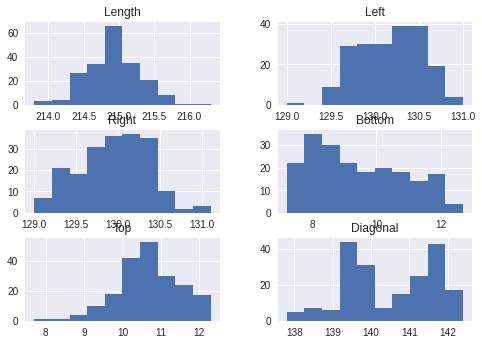

In [31]:
df2[['Length', 'Left', 'Right', 'Bottom', 'Top', 'Diagonal']].hist()

<AxesSubplot:xlabel='Length', ylabel='Count'>

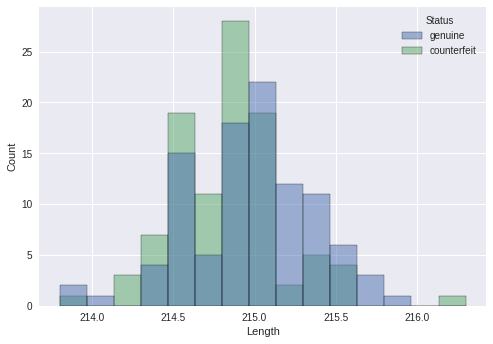

In [35]:
sns.histplot(data=df2, x='Length', hue='Status')

По какаим фичам понять, где банкнота фальшивая, а где нет? По длине этого не понять точно, так как оба распределения очень похожи.

Из графика со всеми распределниями интерес вызывает график диагоналей

<AxesSubplot:xlabel='Diagonal', ylabel='Count'>

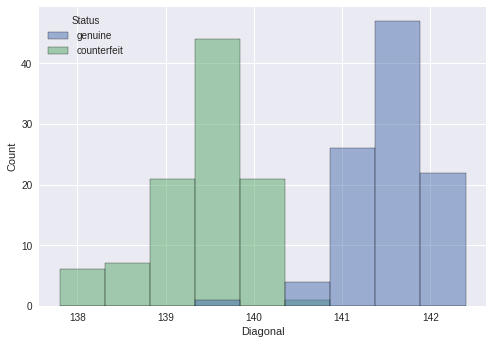

In [36]:
sns.histplot(data=df2, x='Diagonal', hue='Status')

Видна четкая тенденция, что диагональ у фальшивых купюр почти всегда меньше. Также рассмотрим все параметры с помощью диаграмм рассеивания

In [39]:
df2['Status'].unique()

array(['genuine', 'counterfeit'], dtype=object)

array([[<AxesSubplot:xlabel='Length', ylabel='Length'>,
        <AxesSubplot:xlabel='Left', ylabel='Length'>,
        <AxesSubplot:xlabel='Right', ylabel='Length'>,
        <AxesSubplot:xlabel='Bottom', ylabel='Length'>,
        <AxesSubplot:xlabel='Top', ylabel='Length'>,
        <AxesSubplot:xlabel='Diagonal', ylabel='Length'>],
       [<AxesSubplot:xlabel='Length', ylabel='Left'>,
        <AxesSubplot:xlabel='Left', ylabel='Left'>,
        <AxesSubplot:xlabel='Right', ylabel='Left'>,
        <AxesSubplot:xlabel='Bottom', ylabel='Left'>,
        <AxesSubplot:xlabel='Top', ylabel='Left'>,
        <AxesSubplot:xlabel='Diagonal', ylabel='Left'>],
       [<AxesSubplot:xlabel='Length', ylabel='Right'>,
        <AxesSubplot:xlabel='Left', ylabel='Right'>,
        <AxesSubplot:xlabel='Right', ylabel='Right'>,
        <AxesSubplot:xlabel='Bottom', ylabel='Right'>,
        <AxesSubplot:xlabel='Top', ylabel='Right'>,
        <AxesSubplot:xlabel='Diagonal', ylabel='Right'>],
       [<AxesSubplo

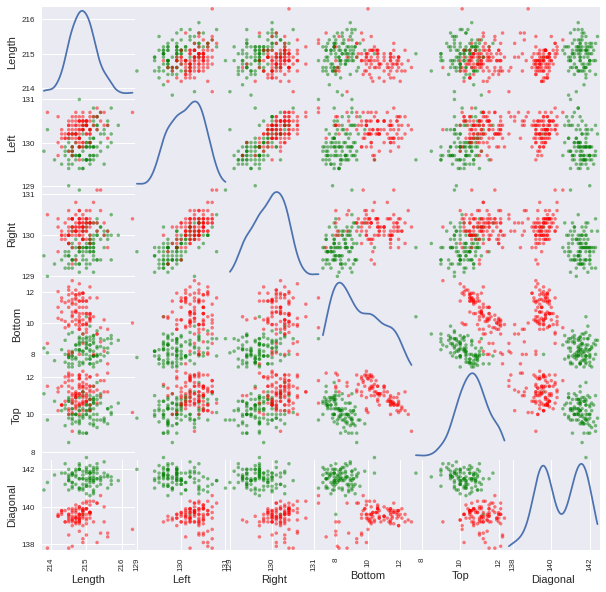

In [41]:
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df2,
               # размер
               figsize=(10, 10),
               # по диагонали будет ядерная оценка плотности 
               diagonal='kde',
               # цвета
               c=df2['Status'].replace(colors)
               )

Видны 2 класса по диагонали, наблюдаются явные классы, на основе которых можно будет сделать алгоритм. Узнаем примерную точность алгоритма:

<AxesSubplot:xlabel='Diagonal', ylabel='Count'>

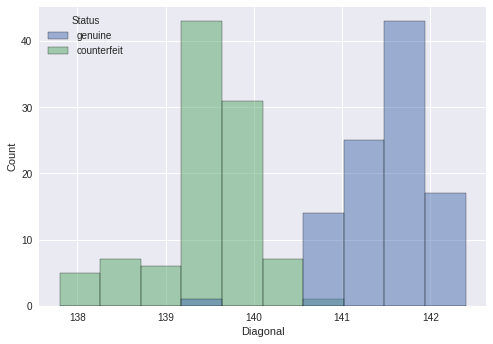

In [43]:
sns.histplot(data=df2, x='Diagonal', hue='Status', bins=10)

Если зададим алгоритму правило: если диагональ меньше 140.5, то фалишивая, тогда точность составит 98% на данной выборке